<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-веществ-на-различных-этапах-очистки" data-toc-modified-id="Концентрация-веществ-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация веществ на различных этапах очистки</a></span></li><li><span><a href="#Распределения-размеров-гранул-сырья" data-toc-modified-id="Распределения-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределения размеров гранул сырья</a></span></li><li><span><a href="#Суммарная-концентрация-веществ-на-разных-стадиях-очистки" data-toc-modified-id="Суммарная-концентрация-веществ-на-разных-стадиях-очистки-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация веществ на разных стадиях очистки</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Модель-решающего-дерева" data-toc-modified-id="Модель-решающего-дерева-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель решающего дерева</a></span></li><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Проверка-качества-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-качества-лучшей-модели-на-тестовой-выборке-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка качества лучшей модели на тестовой выборке</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовим прототип модели машинного обучения для компании, разрабатывающей решения для эффективной работы промышленных предприятий. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.

В данных содержится информация о сырье на разных стадиях очистки: сырье до флотации, черновой концентрат после флотации, концентрат после первой очистки и финальный концентрат после второй очистки. В данных присутствует информация об объёме воздуха, уровне жидкости, размере гранул сырья, скорости подачи, концентрации металлов(Au, Ag, Pb), солей, а также об отвальных хвостах на каждом этапе, о флотационных реагентах, используемых в процессе.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

План работы:

1. Подготовить данные
2. Провести исследовательский анализ данных
3. Построить и обучить модели, выбрать наилучшую на основе метрики sMAPE
4. Проверить лучшую модель на тестовой выборке

## Подготовка данных

In [1]:
import pandas as pd

import numpy as np

import warnings

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyRegressor

In [2]:
try:
    df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
except:
    df_full = pd.read_csv('gold_recovery_full_new.csv')
    df_test = pd.read_csv('gold_recovery_test_new.csv')
    df_train = pd.read_csv('gold_recovery_train_new.csv')

Итак, получили три датафрейма для работы. Обучающий, тестовый и полный.

Изучим общую информацию.

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery.

In [5]:
conc_au_rough = df_train['rougher.output.concentrate_au']
feed_au_rough = df_train['rougher.input.feed_au']
tail_au_rough = df_train['rougher.output.tail_au']

recovery_rough = conc_au_rough * (feed_au_rough - tail_au_rough) / (feed_au_rough * (conc_au_rough - tail_au_rough)) * 100

Найдем MAE между нашими расчётами и значением признака.

In [6]:
mae = mean_absolute_error(df_train['rougher.output.recovery'], recovery_rough)

print('Точное значение MAE =', mae)
print('MAE =', round(mae))

Точное значение MAE = 9.73512347450521e-15
MAE = 0


Среднее абсолютное отклонение (MAE) приблизительно равно нулю. Таким образом, эффективность обогащения рассчитана правильно.

Найдем и проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [7]:
columns_test = df_test.columns
columns_train = df_train.columns
columns_not_in_test = []

for column in columns_train:
    if column not in columns_test:
        columns_not_in_test.append(column)

columns_not_in_test

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Параметры, которых нет в тестовой выборке, - это параметры получившегося в результате флотации/очистки продукта. То есть в тестовой выборке есть только данные о продукте до флотации/очистки. Таким образом тестовая выборка не содержит столбцы с эффективностью обогащения recovery, а также все остальные столбцы output.

Поэтому удалим из обучающего датасета все лишние столбцы, которых нет в тестовой выборке. А также удалим столбец *date* из обоих датафреймов, так как он помешает дальнейшей работе с данными.

In [8]:
df_train = df_train.drop(columns_not_in_test, axis=1)

df_train_date = df_train
df_test_date = df_test

Теперь предобработаем данные. 

В данных заметны были пропуски, нужно их заполнить. Воспользуемся методом ffill, так как соседние по времени параметры часто похожи.

In [9]:
df_test.fillna(method='ffill', inplace=True)
df_train.fillna(method='ffill', inplace=True)

In [10]:
df_train = df_train.drop('date', axis=1)
df_test = df_test.drop('date', axis=1)

Проверим данные на наличие дубликатов.

In [11]:
df_train.duplicated().sum()

0

In [12]:
df_test.duplicated().sum()

0

Явные дубликаты не обнаружены.

Также нужно масштабировать количественные признаки, так как они могут иметь разный разброс значений, из-за чего во время обучения модель может принять какие-то из них как более важные, что исказит результаты предсказаний. Сделаем это с помощью стандартизации данных.

In [13]:
scaler = StandardScaler()
scaler.fit(df_train)

df_train_scaled = scaler.transform(df_train)
df_test_scaled = scaler.transform(df_test)

### Вывод

Итак, данные подготовлены к работе.

Проверили, что эффективность обогащения в данных рассчитана правильно: вычислили её на обучающей выборке для признака rougher.output.recovery, нашли MAE (среднее абсолютное отклонение) между расчётами и значением признака. 

Результат: МАЕ = 0. Из чего следует, что эффективность обогащения подсчитана верно.

Выяснили, каких параметров нет в тестовой выборке: параметры получившегося в результате флотации/очистки продукта. Таким образом тестовая выборка не содержит столбцы с эффективностью обогащения recovery, а также все столбцы output.

Проведена предобработка данных: пропуски заполнены методом ffill (соседнее значение), данные проверены на наличие дубликатов, выяснили, что явных дубликатов в данных нет.

Также масштабировали признаки в обучающем и тестовом датасетах с помощью стандартизации данных.

## Анализ данных

### Концентрация веществ на различных этапах очистки

Теперь можно провести анализ подготовленных данных.

Для начала посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки:
- черновой концентрат после флотации
- концентрат после первой очистки
- финальный концентрат после второй очистки

Для начала построим гистограммы для распределения концентрации золота (Au) на разных этапах очистки.

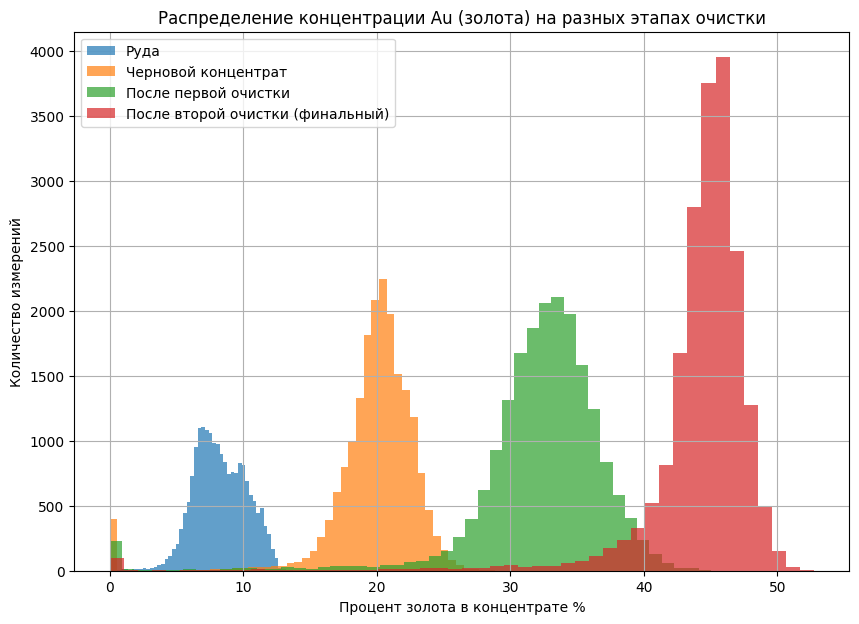

In [14]:
plt.figure(figsize=(10, 7))
plt.grid()

plt.hist(df_full['rougher.input.feed_au'], bins=50, alpha=0.7)
plt.hist(df_full['rougher.output.concentrate_au'], bins=50, alpha=0.7)
plt.hist(df_full['primary_cleaner.output.concentrate_au'], bins=50, alpha=0.7)
plt.hist(df_full['final.output.concentrate_au'], bins=50, alpha=0.7)

plt.legend(['Руда', 'Черновой концентрат', 'После первой очистки', 'После второй очистки (финальный)'])
plt.title('Распределение концентрации Au (золота) на разных этапах очистки')
plt.xlabel('Процент золота в концентрате %')
plt.ylabel('Количество измерений')
plt.show()

Как видно на гистограммах, концентрация золота с каждым этапом очистки увеличивается:
- в золотосодержащей руде около 7-9%
- в черновом концентрате в среднем около 20%
- после первой очистки около 33%
- в финальном концентрате после второй очистки около 45%

Процент золота в сырье растет с каждым этапом, что логично, так как идет процесс очистки руды от примесей для добычи ценных металлов, в данном случае - золота.

Также в данных замечены выбросы около 0. Скорее всего это ошибки измерений, стоит в будущем убрать эти некорректные данные.

Теперь построим гистограммы для концентрации серебра.

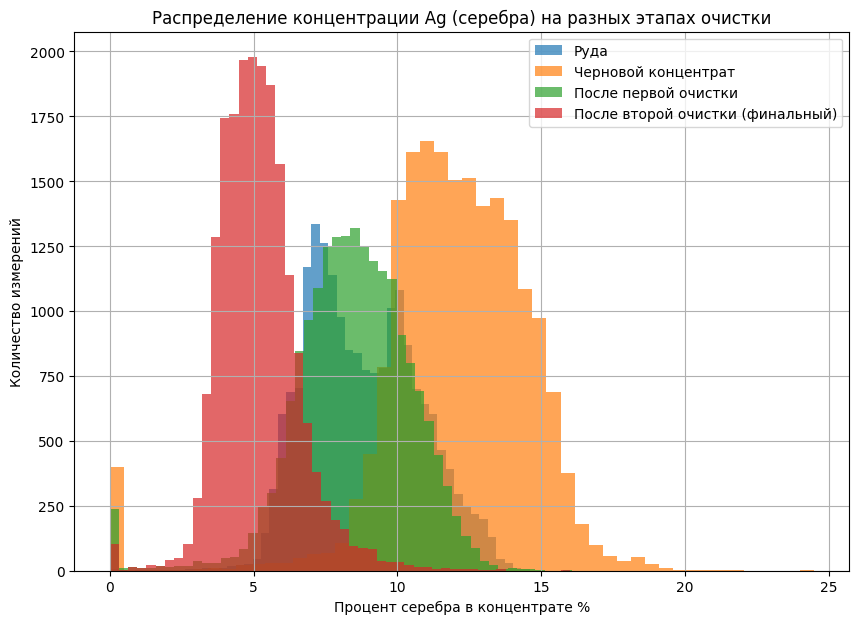

In [15]:
plt.figure(figsize=(10, 7))
plt.grid()

plt.hist(df_full['rougher.input.feed_ag'], bins=50, alpha=0.7)
plt.hist(df_full['rougher.output.concentrate_ag'], bins=50, alpha=0.7)
plt.hist(df_full['primary_cleaner.output.concentrate_ag'], bins=50, alpha=0.7)
plt.hist(df_full['final.output.concentrate_ag'], bins=50, alpha=0.7)

plt.legend(['Руда', 'Черновой концентрат', 'После первой очистки', 'После второй очистки (финальный)'])
plt.title('Распределение концентрации Ag (серебра) на разных этапах очистки')
plt.xlabel('Процент серебра в концентрате %')
plt.ylabel('Количество измерений')
plt.show()

Здесь видна уже несколько иная картина. Концентрация серебра меняется в разные стороны на каждом этапе:
- в золотосодержащей руде серебра около 5%
- в черновом концентрате серебра около 11%
- после первой очистки в среднем 8%
- в финальном концентрате примерно 5%

После первого этапа, флотации, процент серебра в концентрате вырос, вероятно потому, что на данном этапе избавлялись от различных примесей кроме ценных металлов. А на следующих этапах процент серебра снижался, так как сырье очищалось от всего, кроме искомого золота.

Далее рассмотрим концентрацию свинца на разных этапах.

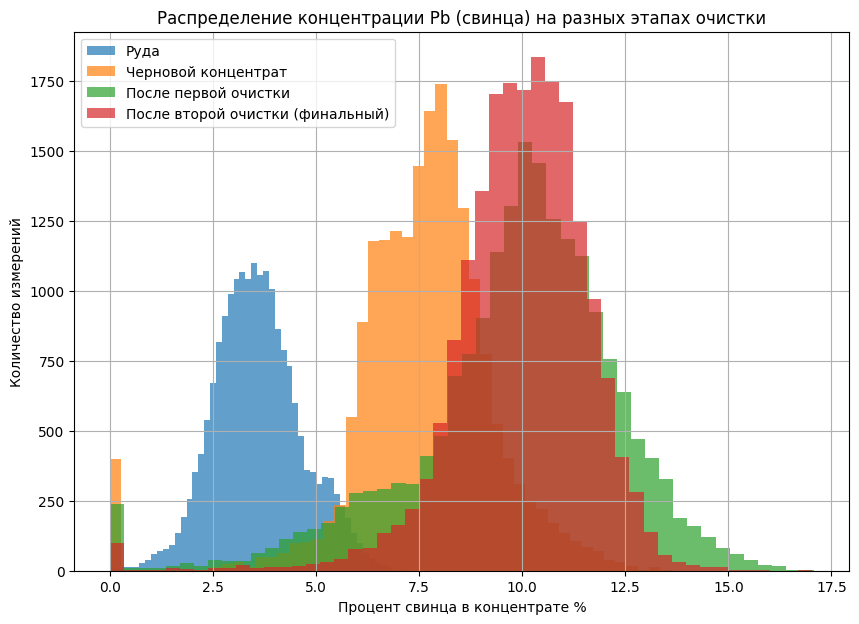

In [16]:
plt.figure(figsize=(10, 7))
plt.grid()

plt.hist(df_full['rougher.input.feed_pb'], bins=50, alpha=0.7)
plt.hist(df_full['rougher.output.concentrate_pb'], bins=50, alpha=0.7)
plt.hist(df_full['primary_cleaner.output.concentrate_pb'], bins=50, alpha=0.7)
plt.hist(df_full['final.output.concentrate_pb'], bins=50, alpha=0.7)

plt.legend(['Руда', 'Черновой концентрат', 'После первой очистки', 'После второй очистки (финальный)'])
plt.title('Распределение концентрации Pb (свинца) на разных этапах очистки')
plt.xlabel('Процент свинца в концентрате %')
plt.ylabel('Количество измерений')
plt.show()

Итак, получили такие результаты для концентрации свинца:
- в руде около 3%
- в черновом концентрате около 8%
- после первой очистки примерно 10%
- после второй очистки также около 10%

Концентрация свинца с каждым этапом растет. Вероятно, во время флотации уменьшается процент содержания различных примесей, следовательно растет процент металлов, в том числе свинца.

### Распределения размеров гранул сырья

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Надо удостовериться, что распределения не отличаются друг от друга, иначе оценка модели будет неправильной.

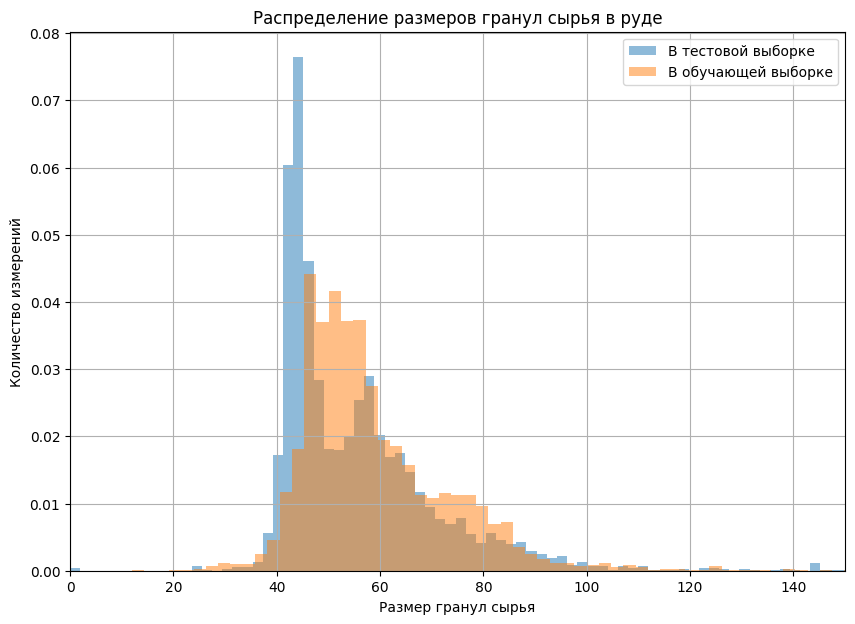

In [17]:
plt.figure(figsize=(10, 7))
plt.grid()

plt.hist(df_test['rougher.input.feed_size'], density=True, bins=200, alpha=0.5)
plt.hist(df_train['rougher.input.feed_size'], density=True, bins=200, alpha=0.5)

plt.legend(['В тестовой выборке', 'В обучающей выборке'])
plt.title('Распределение размеров гранул сырья в руде')
plt.xlabel('Размер гранул сырья')
plt.ylabel('Количество измерений')
plt.xlim(0, 150)
plt.show()

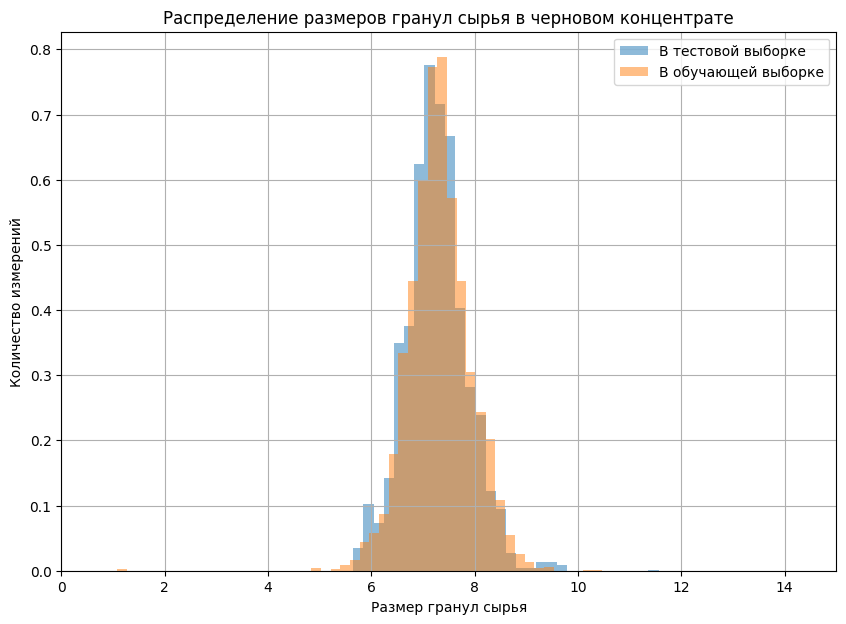

In [18]:
plt.figure(figsize=(10, 7))
plt.grid()

plt.hist(df_test['primary_cleaner.input.feed_size'], density=True, bins=50, alpha=0.5)
plt.hist(df_train['primary_cleaner.input.feed_size'], density=True, bins=50, alpha=0.5)

plt.legend(['В тестовой выборке', 'В обучающей выборке'])
plt.title('Распределение размеров гранул сырья в черновом концентрате')
plt.xlabel('Размер гранул сырья')
plt.ylabel('Количество измерений')
plt.xlim(0, 15)
plt.show()

Итак, гистограммы для распределения размеров гранул сырья в руде и черновом концентрате на основании данных тестовой и обучающей выборок **похожи**. Различается в основном масштаб графиков, так как количество измерений в обучающей выборке значительно больше. Но сами графики и пиковые значения находятся в примерно одинаковых интервалах.

### Суммарная концентрация веществ на разных стадиях очистки

Исследуем суммарную концентрацию всех веществ (Au, Ag, Pb) на разных стадиях: в сырье, в черновом и финальном концентратах.

In [19]:
# в финальном концентрате
df_full['final.output.concentrate_metal'] = df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_pb'] + df_full['final.output.concentrate_au']

# в черновом концентрате
df_full['rougher.output.concentrate_metal'] = df_full['rougher.output.concentrate_ag'] + df_full['rougher.output.concentrate_pb'] + df_full['rougher.output.concentrate_au']

# в сырье
df_full['rougher.input.feed_metal'] = df_full['rougher.input.feed_ag'] + df_full['rougher.input.feed_pb'] + df_full['rougher.input.feed_au']

In [20]:
# в финальном концентрате
df_full['final.output.concentrate_sum'] = df_full['final.output.concentrate_sol'] + df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_pb'] + df_full['final.output.concentrate_au'] 

# в черновом концентрате
df_full['rougher.output.concentrate_sum'] = df_full['rougher.output.concentrate_sol'] + df_full['rougher.output.concentrate_ag'] + df_full['rougher.output.concentrate_pb'] + df_full['rougher.output.concentrate_au']

# в сырье
df_full['rougher.input.feed_sum'] = df_full['rougher.input.feed_sol'] + df_full['rougher.input.feed_ag'] + df_full['rougher.input.feed_pb'] + df_full['rougher.input.feed_au']

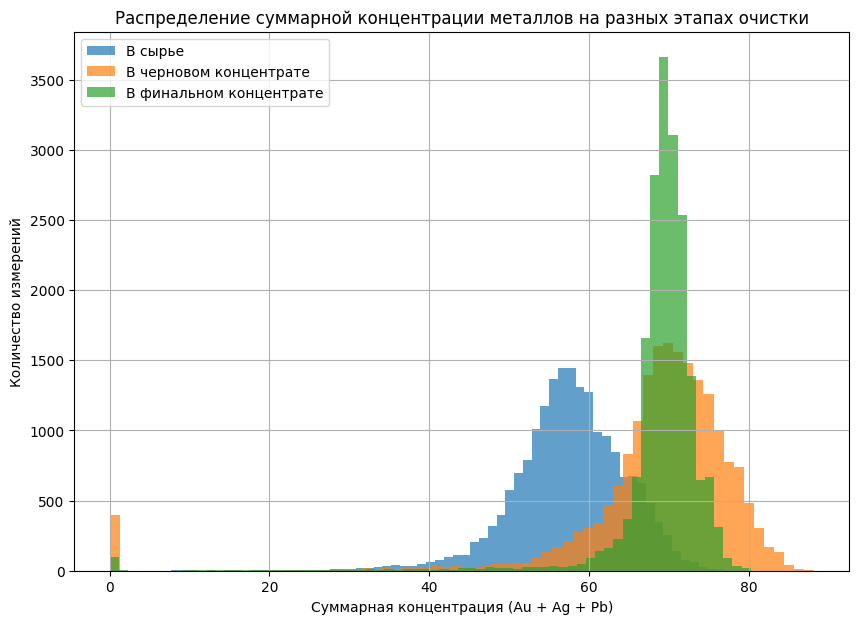

In [21]:
plt.figure(figsize=(10, 7))
plt.grid()

plt.hist(df_full['rougher.input.feed_sum'], bins=70, alpha=0.7)
plt.hist(df_full['rougher.output.concentrate_sum'], bins=70, alpha=0.7)
plt.hist(df_full['final.output.concentrate_sum'], bins=70, alpha=0.7)

plt.legend(['В сырье', 'В черновом концентрате', 'В финальном концентрате'])
plt.title('Распределение суммарной концентрации металлов на разных этапах очистки')
plt.xlabel('Суммарная концентрация (Au + Ag + Pb)')
plt.ylabel('Количество измерений')
plt.show()

Итак, исходя из графиков, на каждом этапе суммарная концентрация ценных металлов в продукте растет. Что логично, так как сырье очищают от ненужных примесей, следовательно процент металлов в продукте увеличивается.

Результаты таковы, суммарная концентрация ценных металлов в среднем:
- в сырье около 20%
- в черновом концентрате около 40%
- в финальном концентрате примерно 60%

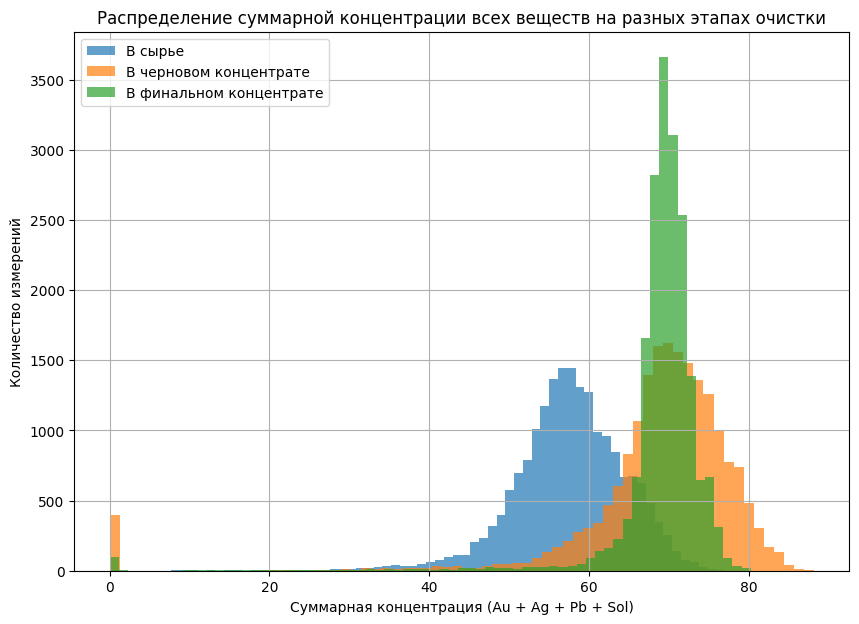

In [22]:
plt.figure(figsize=(10, 7))
plt.grid()

plt.hist(df_full['rougher.input.feed_sum'], bins=70, alpha=0.7)
plt.hist(df_full['rougher.output.concentrate_sum'], bins=70, alpha=0.7)
plt.hist(df_full['final.output.concentrate_sum'], bins=70, alpha=0.7)

plt.legend(['В сырье', 'В черновом концентрате', 'В финальном концентрате'])
plt.title('Распределение суммарной концентрации всех веществ на разных этапах очистки')
plt.xlabel('Суммарная концентрация (Au + Ag + Pb + Sol)')
plt.ylabel('Количество измерений')
plt.show()

Результаты таковы, суммарная концентрация всех веществ, то есть ценных металлов и солей, в среднем:

- в сырье около 55%
- в черновом концентрате около 70%
- в финальном концентрате примерно 70%

Также снова заметны аномальные значения около 0. Судя по всему это ошибки в измерениях или технические ошибки в данных. Необходимо их удалить, так как они могут исказить дальнейшие результаты исследования.

In [23]:
def delete_zero_values(data, list_columns):
    for column in list_columns:
        data = data[data[column] > 1]
    return data

In [24]:
au_columns = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']

df_full = delete_zero_values(df_full, au_columns)

### Вывод

Итак, проанализировали данные. 

Вначале рассмотрели, как меняется концентрация металлов Au, Ag, Pb на разных этапах очистки. Выяснилось, что концентрации свинца (до 10%) и золота (до 45%) растут на каждом этапе, а вот концентрация серебра меняется в разные стороны (5-11%).

Далее проверили распределения размеров гранул для обучающей и тестовой выборок. Выяснили, что распределения схожи.

Также рассмотрели распределение суммарной концентрации металлов (Au + Ag + Pb) на разных этапах очистки. С каждым этапом концентрация растет: в сырье 20%, в черновом концентрате 40%, в финальном 60%.

Обнаружили данные с аномальными значениями концентрации металлов около 0. Удалили строки с этими выбросами.

## Модель

Напишем функцию для вычисления итоговой sMAPE («симметричное среднее абсолютное процентное отклонение») с учетом того, что ее надо рассчитывать для двух величин и итоговый результат должен быть таким: 75% smape для финального концентрата + 25% smape для чернового концентрата.

In [25]:
def smape(target, pred):
    target_rough = target[:, 0]
    pred_rough = pred[:, 0]
    target_final = target[:, 1]
    pred_final = pred[:, 1]
    
    smape_rough = 1/len(pred) * np.sum(2 * np.abs(target_rough-pred_rough) / (np.abs(pred_rough) + np.abs(target_rough))*100)
    smape_final = 1/len(pred) * np.sum(2 * np.abs(target_final-pred_final) / (np.abs(pred_final) + np.abs(target_final))*100)
    
    return np.abs(0.25*smape_rough + 0.75*smape_final)

Теперь надо разделить выборки на признаки и целевой признак, в данном случае - вектор из двух значений recovery для чернового и финального концентратов.

Для начала надо получить индексы строк в полном датасете, которые соответствуют строкам в обучающей выборке, для чего воспользуемся методом merge.

In [26]:
target_full = df_full[['rougher.output.recovery', 'final.output.recovery']]

united_df_train = df_full.merge(df_train_date, on='date', how='right')

features_train = pd.DataFrame(df_train_scaled)

target_train = target_full.iloc[united_df_train.index]
target_train = target_train.to_numpy()

Проделаем то же для тестовой выборки.

In [27]:
united_df_test = df_full.merge(df_test_date, on='date', how='right')

features_test = pd.DataFrame(df_test_scaled)

target_test = target_full.iloc[united_df_test.index]
target_test = target_test.to_numpy()

Теперь подберем гиперпараметры с помощью GridSearchCV, после чего обучим разные модели на полученных данных и оценим их качество кросс-валидацией. После чего выберем лучшую модель и проверим её на тестовой выборке.

Гиперпараметры для случайного леса и дерева решений:

In [28]:
parameters_forest = { 'n_estimators': range (1, 101, 20),
                     'max_depth': range (2,15,3),
                     'min_samples_split': range (2,14,5) }

parameters_tree = { 'max_depth': range (2,15,2),
                   'min_samples_leaf': range (2,14,5),
                   'min_samples_split': range (2,14,5) }

### Модель случайного леса

Начнем со случайного леса. Подберем налучшие гиперпараметры и создадим лучшую модель с этими гиперпараметрами.

In [29]:
%%time

model_rfr = RandomForestRegressor(random_state=12345)

gs_rfr = GridSearchCV(estimator=model_rfr, param_grid=parameters_forest, 
                      scoring=make_scorer(smape, greater_is_better=False), n_jobs=-1, verbose=2)
gs_rfr.fit(features_train, target_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
CPU times: total: 9.16 s
Wall time: 5min 33s


GridSearchCV(estimator=RandomForestRegressor(random_state=12345), n_jobs=-1,
             param_grid={'max_depth': range(2, 15, 3),
                         'min_samples_split': range(2, 14, 5),
                         'n_estimators': range(1, 101, 20)},
             scoring=make_scorer(smape, greater_is_better=False), verbose=2)

Теперь найдем лучший результат метрики sMAPE с помощью кросс-валидации.

In [30]:
best_model_rfr = gs_rfr.best_estimator_

scores_rfr = cross_val_score(best_model_rfr, features_train, target_train, cv=10, 
                         scoring=make_scorer(smape, greater_is_better=False))

print('Среднее значение sMAPE для модели случайного леса:', round(scores_rfr.mean(), 2), '%')

Среднее значение sMAPE для модели случайного леса: -9.04 %


Среднее процентное отклонение от истинных значений для лучшей модели случайного леса составляет более 9%, что довольно много. Это не лучший результат, так как ошибки в предсказаниях этой модели в среднем будут составлять около 9%.

### Модель решающего дерева

Проделаем то же самое с моделью решающего дерева: найдем наилучшие гиперпараметры и лучшую модель.

In [31]:
%%time

model_dtr = DecisionTreeRegressor(random_state=12345)

gs_dtr = GridSearchCV(estimator=model_dtr, param_grid=parameters_tree, 
                      scoring=make_scorer(smape, greater_is_better=False), n_jobs=-1, verbose=2)
gs_dtr.fit(features_train, target_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits
CPU times: total: 750 ms
Wall time: 10.5 s


GridSearchCV(estimator=DecisionTreeRegressor(random_state=12345), n_jobs=-1,
             param_grid={'max_depth': range(2, 15, 2),
                         'min_samples_leaf': range(2, 14, 5),
                         'min_samples_split': range(2, 14, 5)},
             scoring=make_scorer(smape, greater_is_better=False), verbose=2)

In [32]:
best_model_dtr = gs_dtr.best_estimator_

scores_dtr = cross_val_score(best_model_dtr, features_train, target_train, cv=10, 
                         scoring=make_scorer(smape, greater_is_better=False))

print('Среднее значение sMAPE для модели решающего дерева:', round(scores_dtr.mean(), 2), '%')

Среднее значение sMAPE для модели решающего дерева: -8.83 %


Результат для дерева решений также довольно высок, ошибки также в среднем достигают почти 9%, что является не лучшим результатом.

### Модель линейной регрессии

In [33]:
model_lr = LinearRegression(n_jobs=-1)
model_lr.fit(features_train, target_train)
predictions_lr = model_lr.predict(features_train)

In [34]:
scores_lr = cross_val_score(model_lr, features_train, target_train, cv=10, 
                            scoring=make_scorer(smape, greater_is_better=False))
print('Среднее значение sMAPE для модели линейной регрессии:', round(scores_lr.mean(), 2), '%')

Среднее значение sMAPE для модели линейной регрессии: -9.67 %


Результат модели линейной регрессии хуже чем у решающего дерева или случайного леса, более 9.67%

Исходя из полученных результатов - модель **решающего дерева** показала себя лучше всего, так как средний процент ошибок относительно истинного значения менее 9%.

### Проверка качества лучшей модели на тестовой выборке

Теперь полученную модель решающего дерева с наилучшими результатами можно проверить на тестовой выборке.

In [35]:
predictions_test_dtr = best_model_dtr.predict(features_test)

dr = DummyRegressor()

dr.fit(features_train, target_train) 

predictions_dr_test = dr.predict(features_test)

smape_test_dtr = smape(target_test, predictions_test_dtr)
smape_test_dr = smape(target_test, predictions_dr_test)

print('Среднее значение sMAPE для константной модели:', round(smape_test_dr.mean(), 2), '%')

print('Среднее значение sMAPE для модели решающего дерева:', round(smape_test_dtr.mean(), 2), '%')

Среднее значение sMAPE для константной модели: 9.28 %
Среднее значение sMAPE для модели решающего дерева: 9.49 %


На тестовой выборке модель показала результат хуже: 9.49%, что даже меньше чем у константной модели. Скорее всего это вызвано некорректными изначальными данными, так как в данном случае признаки и целевой признак выглядят не взаимосвязанными.

## Общий вывод

Итак, проведено исследование данных о восстановлении золота из золотосодержащей руды. 

Для работы были предоставлены три датафрейма: полный, обучающий и тестовый. 

В данных содержалась информация о продукте на разных стадиях очистки: до флотации, черновой концентрат после флотации, концентрат после первой очистки и финальный концентрат после второй очистки. В данных присутствовала информация об объёме воздуха, уровне жидкости, размере гранул сырья, скорости подачи, концентрации металлов(Au, Ag, Pb), солей, а также об отвальных хвостах на каждом этапе, о флотационных реагентах, используемых в процессе.

Целью работы было создание модели для предсказывания коэффициента восстановления золота из золотосодержащей руды, чтобы оптимизировать производство и не запускать убыточное предприятие.

Шаги работы:

**1. Подготовка данных**

**1.1.** Файлы открыты и изучены, данные подготовлены к работе.

**1.2.** Проверили, что эффективность обогащения в исходных данных рассчитана правильно: вычислили её на обучающей выборке для признака rougher.output.recovery, нашли MAE (среднее абсолютное отклонение) между расчётами и значением признака. Получили результат: МАЕ примерно равно 0, из чего следует, что эффективность обогащения подсчитана верно.

**1.3.** Выяснили, каких параметров нет в тестовой выборке: в выборке нет параметров продукта после флотации/очистки, то есть столбцов output, а также данных об эффективности обогащения recovery.

**1.4.** Проведена предобработка данных: пропуски заполнены методом fillna с параметром ffill (предыдущее значение). Также данные проверены на наличие дубликатов. Выяснили, что явных дубликатов в данных нет. Масштабировали количественные признаки с помощью стандартизации данных.

**2. Анализ данных**

**2.1.** Проанализировали, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

Построили гистограммы распределения концентрации **золота** на каждым этапе очистки:

- в золотосодержащей руде около 7-9%
- в черновом концентрате в среднем около 20%
- после первой очистки около 33%
- в финальном концентрате после второй очистки около 45%

Процент золота в сырье растет с каждым этапом, что логично, так как идет процесс очистки руды от примесей для добычи ценных металлов, в данном случае - золота.

Построили гистограммы распределения концентрации **серебра** на каждым этапе очистки:

- в золотосодержащей руде около 5%
- в черновом концентрате около 11%
- после первой очистки в среднем 8%
- в финальном концентрате примерно 5%

После первого этапа, флотации, процент серебра в концентрате вырос, вероятно потому, что на данном этапе избавлялись от различных примесей кроме ценных металлов. А на следующих этапах процент серебра снижался, так как сырье очищалось от всего, кроме искомого золота.

Построили гистограммы распределения концентрации **свинца** на каждым этапе очистки:

- в золотосодержащей руде около 3%
- в черновом концентрате около 8%
- после первой очистки примерно 10%
- после второй очистки также около 10%

Концентрация свинца с каждым этапом растет. Вероятно, во время флотации уменьшается процент содержания различных примесей, следовательно растет процент металлов, в том числе свинца.

**2.2.** Сравнили распределения размеров гранул сырья на обучающей и тестовой выборках. Так как если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

Гистограммы для распределения размеров гранул сырья в руде и черновом концентрате на основании данных тестовой и обучающей выборок оказались схожи. Различается в основном масштаб графиков, так как количество измерений в обучающей выборке значительно больше. Но сами графики и пиковые значения находятся в примерно одинаковых интервалах. Таким образом, размер гарнул сырья в выборках примерно одинаковый.

**2.3.** Исследовали суммарную концентрацию всех веществ на разных стадиях очистки.

Результаты таковы, суммарная концентрация ценных металлов в среднем:

- в сырье около 20%
- в черновом концентрате около 40%
- в финальном концентрате примерно 60%

Итак, исходя из графиков, на каждом этапе суммарная концентрация ценных металлов в продукте растет. Что логично, так как сырье очищают от ненужных примесей, следовательно процент металлов в продукте увеличивается.

Также заметили аномальные значения концентрации металлов около 0. Так как скорее всего это ошибки в измерениях или технические ошибки в данных, то выбросы были удалены, так как они могли исказить результаты исследования.

**3. Подбор лучшей модели**

**3.1.** В начале была написана функция для вычисления итоговой sMAPE («симметричное среднее абсолютное процентное отклонение»).

**3.2.** Подобраны гиперпараметры для моделей случайного леса и дерева решений с помощью GridSearchCV. Созданы и обучены модели случайного леса, дерева решений и линейной регрессии. С помощью кросс-валидации найдены результаты метрики sMAPE:

- Среднее значение sMAPE для модели случайного леса: -8.98 %

- Среднее значение sMAPE для модели решающего дерева: -8.83 %

- Среднее значение sMAPE для модели линейной регрессии: -9.67 %

**3.3.** Выбрана лучшая модель и проверена на тестовой выборке.

Как видно по результатам исследования, лучшая модель - **модель решающего дерева**, так как процентое отклонение предсказаний этой модели наименьшее среди трех моделей

Результат модели решающего дерева на тестовой выборке: 
- Среднее значение sMAPE для модели дерева решений: 9.49 %